<a href="https://colab.research.google.com/github/jacobdwatters/Machine-Learning-Basics/blob/main/logistic_regression/01_logistic_regression_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# Logistic Regression With NumPy

---


#### Imports and Setup

In [528]:
import math

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

---

## 1. Define the Logistic Regression Class

---

In [529]:
class LogisticRegression:
  
  def __init__(self, lr=0.05, iterations=1000):
    self.lr = lr
    self.iterations = iterations 

  def sigmoid(self, X):
    """sigmoid/logistic function"""
    return 1 / (1+np.exp(-X@self.w))
  
  def bce_grad(self, X, y):
    """binary cross-entropy gradient"""
    return X.T@(self.sigmoid(X)-y)

  def grad_descent(self, V, y):
    """Gradient Descent"""
    # initialize weights to random value
    self.w = np.random.normal(0, 0.2, size=(len(V[0]), 1))

    for i in range(self.iterations):
      self.w = self.w - self.lr*self.bce_grad(V, y)

  def fit(self, X, y):
    V = np.column_stack((np.ones(len(X)), X))
    self.grad_descent(V, y)

  def predict(self, X):
    V = np.column_stack((np.ones(len(X)), X))
    return np.round(self.sigmoid(V))

  def predict_proba(self, X):
    V = np.column_stack((np.ones(len(X)), X))
    predictions = self.sigmoid(V)
    return np.column_stack((predictions, 1-predictions))

  def __str__(self):
    model_str = 'y = 1 / [1 + e^{-('

    for i, w_i in enumerate(self.w.flatten()):
      model_str += str(w_i)

      if i>0:
        model_str += "x_" + str(i)
      if i!=len(self.w.flatten())-1:
        model_str += ' + '

    return model_str + ')}]'

---

## 2. One Dimensional Logistic Regression

---

First, we will take a look at fitting a logistic regression model to a dataset with a single feature and a single target.

#### Generate Dataset

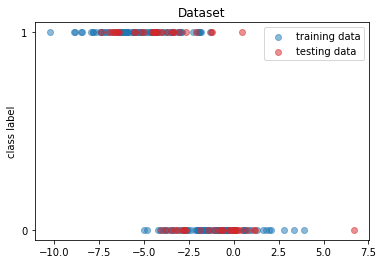

In [530]:
train_size = 150
test_size = 60

np.random.seed(42)

# Training dataset
X_train1 = np.append(
      np.random.normal(-5, 2, train_size//2), 
      np.random.normal(-1, 2, train_size//2)
    ).reshape(-1, 1)
y_train1 = np.append(
      [1]*(train_size//2), 
      [0]*(train_size//2)
    ).reshape(-1, 1)

# Testing dataset
X_test1 = np.append(
      np.random.normal(-5, 2, test_size//2), 
      np.random.normal(-1, 2, test_size//2)
    ).reshape(-1, 1)
y_test1 = np.append(
      [1]*(test_size//2), 
      [0]*(test_size//2)
    ).reshape(-1, 1)

plt.scatter(X_train1, y_train1, c='tab:blue', label='training data', alpha=0.5)
plt.scatter(X_test1, y_test1, c='tab:red', label='testing data', alpha=0.5)
plt.title("Dataset")
plt.yticks([0, 1])
plt.ylabel('class label')
plt.legend()
plt.show()

#### Fit a Logistic Regression Model to the Training Data

In [531]:
logreg = LogisticRegression(0.01)
logreg.fit(X_train1, y_train1)

print('Regression Model:\n', logreg, "\n")
print('Model Parameters:\n', logreg.w.flatten())

Regression Model:
 y = 1 / [1 + e^{-(-3.807275240299877 + -1.2148588040793835x_1)}] 

Model Parameters:
 [-3.80727524 -1.2148588 ]


#### Use Fit Model to Make Predictions on the Testing Data

In [532]:
np.random.seed(100)
y_pred1 = logreg.predict(X_test1)
y_pred_proba1 = logreg.predict_proba(X_test1)

print('First 10 predictions:\n' + '-'*21)
print('Class Predictions:', y_pred1.flatten()[0:10])
print('Class Probabilities:\n', np.round(y_pred_proba1, 3)[0:10])

First 10 predictions:
---------------------
Class Predictions: [1. 1. 1. 1. 1. 1. 0. 1. 1. 1.]
Class Probabilities:
 [[0.84  0.16 ]
 [0.806 0.194]
 [0.981 0.019]
 [0.846 0.154]
 [0.826 0.174]
 [0.982 0.018]
 [0.094 0.906]
 [0.753 0.247]
 [0.994 0.006]
 [0.662 0.338]]


#### Model Visualization

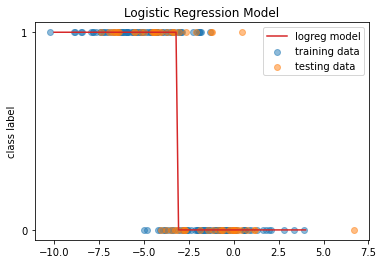

In [533]:
D = np.linspace(-10, 4, 100)
R = logreg.predict(D)

plt.scatter(X_train1, y_train1, c='tab:blue', label='training data', alpha=0.5)
plt.scatter(X_test1, y_test1, c='tab:orange', label='testing data', alpha=0.5)
plt.plot(D, R, c='tab:red', label='logreg model')
plt.title("Logistic Regression Model")
plt.yticks([0, 1])
plt.ylabel('class label')
plt.legend()
plt.show()

#### Metrics
Now that we have fit a logistic regression model to the training data and used it to make predictions on the testing data, let's evaluate how good the model is at predicting the class of data sample.

##### Accuracy, Precision, Recall, and F1 Score

In [534]:
def accuracy(y, y_pred):
  return np.sum(y==y_pred)/len(y)

def precision(y, y_pred):
  tp = np.sum(np.logical_and(y==y_pred, y_pred==1))
  fp = np.sum(np.logical_and(y!=y_pred, y_pred==1))
  return tp/(tp+fp)

def recall(y, y_pred):
  tp = np.sum(np.logical_and(y==y_pred, y_pred==1))
  fn = np.sum(np.logical_and(y!=y_pred, y_pred==0))
  return tp/(tp+fn)

def f1(y, y_pred):
  pre = precision(y, y_pred)
  rec = recall(y, y_pred)
  return 2*pre*rec / (pre + rec)

In [535]:
print('Classification Metrics (testing data):\n' + '-'*38)
print('accuracy = %.3f' % accuracy(y_test1, y_pred1))
print('precsion = %.3f' % precision(y_test1, y_pred1))
print('recall = %.3f' % recall(y_test1, y_pred1))
print('f1 score = %.3f' % f1(y_test1, y_pred1))

Classification Metrics (testing data):
--------------------------------------
accuracy = 0.817
precsion = 0.828
recall = 0.800
f1 score = 0.814


##### Confusion Matrix

If may be useful to look at all true positives, false positives, true negatives, and false negatives from the models predictions. We can put these four values in a matrix called a confustion matrix and plot it.

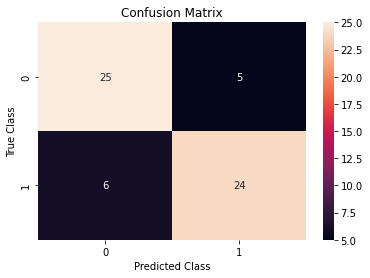

In [536]:
def conf_mat(y, y_pred):
  tp = np.sum(np.logical_and(y==y_pred, y_pred==1))
  fp = np.sum(np.logical_and(y!=y_pred, y_pred==1))
  tn = np.sum(np.logical_and(y==y_pred, y_pred==0))
  fn = np.sum(np.logical_and(y!=y_pred, y_pred==0))
  
  return np.array([[tn, fp], [fn, tp]])


cf = conf_mat(y_test1, y_pred1)

sns.heatmap(cf, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

##### Receiver Operating Characteristic (ROC) Curve and AUC

Area Under Curve (AUC): 0.908888888888889


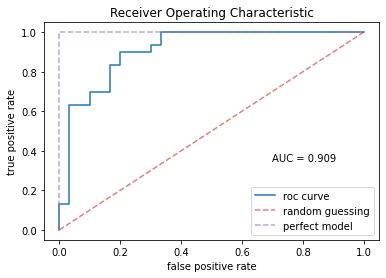

In [537]:
def get_roc(y_test, y_pred_proba):
  tp_rates = []
  fp_rates = []
  probabilities = y_pred_proba[:, 1].flatten()

  for p in np.linspace(0, 1, 1000):
    y_test_preds = probabilities > p
    y_test_preds = y_test_preds.reshape(-1, 1)

    fp = np.sum(np.logical_and(y_test!=y_test_preds, y_test_preds==1))
    tn = np.sum(np.logical_and(y_test==y_test_preds, y_test_preds==0))

    tpr = recall(y_test, y_test_preds)
    fpr = fp / (fp + tn)

    tp_rates.append(tpr)
    fp_rates.append(fpr)

  tp_rates = np.array(tp_rates)
  fp_rates = np.array(fp_rates)

  heights = tp_rates[0:-1]
  widths = -np.diff(fp_rates)
  auc = 1-sum(heights*widths)

  return tp_rates, fp_rates, auc

tp_rates, fp_rates, auc = get_roc(y_test1, y_pred_proba1)

# Plot roc curve
print('Area Under Curve (AUC):', auc)
plt.plot(tp_rates, fp_rates, label='roc curve')
plt.plot([0, 1], [0, 1], label='random guessing', c='tab:red', linestyle='dashed', alpha=0.6)
plt.plot([0, 0, 1], [0, 1, 1], label='perfect model', c='tab:purple', linestyle='dashed', alpha=0.6)
plt.title('Receiver Operating Characteristic')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.text(0.7, 0.35, 'AUC = ' + str(round(auc, 3)))
plt.legend()
plt.show()

---

## 3. Multi-Feature Logistic Regression

---

Now let's take a look at fitting a logistic regression model to a dataset with multiple features and a single target.

#### Generate Dataset

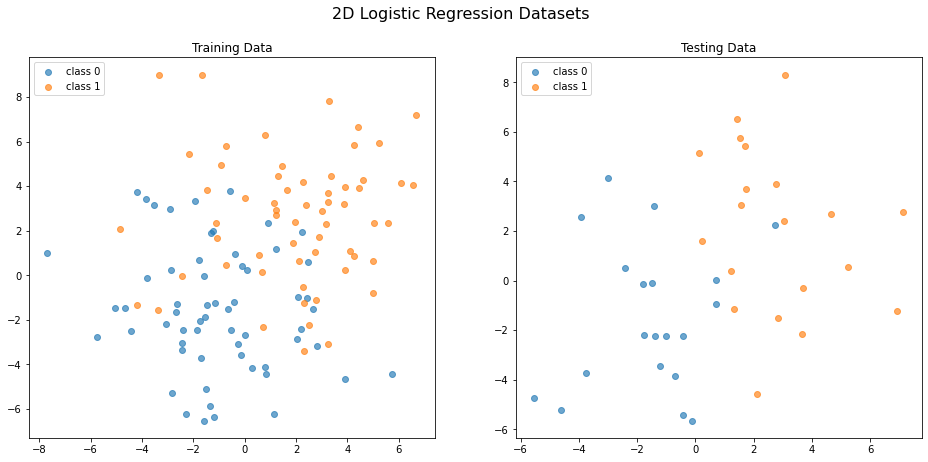

In [538]:
def generate_data(seed, x_shape):
  np.random.seed(seed)
  x1 = np.random.normal(-1, 2.5, size=x_shape)
  x2 = np.random.normal(2.2, 2.5, size=x_shape)
  y1 = np.zeros((x_shape[0], 1))
  y2 = np.ones((x_shape[0], 1))

  return np.vstack((x1, x2)), np.vstack((y1, y2))

X_train2, y_train2 = generate_data(150, (60, 2))
X_test2, y_test2 = generate_data(15, (20, 2))


# Plot datasets
fig, ax = plt.subplots(1, 2, figsize=(16, 7))
plt.suptitle('2D Logistic Regression Datasets', fontsize=16)

X_train2_class0 = X_train2[y_train2.flatten()==0]
X_train2_class1 = X_train2[y_train2.flatten()==1]
ax[0].scatter(X_train2_class0[:, 0], X_train2_class0[:, 1], c='tab:blue', alpha=0.65, label='class 0')
ax[0].scatter(X_train2_class1[:, 0], X_train2_class1[:, 1], c='tab:orange', alpha=0.65, label='class 1')
ax[0].set_title('Training Data')
ax[0].legend(loc='upper left')

X_test2_class0 = X_test2[y_test2.flatten()==0]
X_test2_class1 = X_test2[y_test2.flatten()==1]
ax[1].scatter(X_test2_class0[:, 0], X_test2_class0[:, 1], c='tab:blue', alpha=0.65, label='class 0')
ax[1].scatter(X_test2_class1[:, 0], X_test2_class1[:, 1], c='tab:orange', alpha=0.65, label='class 1')
ax[1].set_title('Testing Data')
ax[1].legend(loc='upper left')

plt.show()

#### Fit a Logistic Regression Model to the Training Data

In [539]:
logreg_2d = LogisticRegression(0.01)
logreg_2d.fit(X_train2, y_train2)

print('Regression Model:\n', logreg_2d, "\n")
print('Model Parameters:\n', logreg_2d.w.flatten())

Regression Model:
 y = 1 / [1 + e^{-(-0.46198278154135214 + 0.47846314112423943x_1 + 0.5231959052729238x_2)}] 

Model Parameters:
 [-0.46198278  0.47846314  0.52319591]


#### Use Fit Model to Make Predictions on the Testing Data

In [540]:
y_pred2 = logreg_2d.predict(X_test2)
y_pred_proba2 = logreg_2d.predict_proba(X_test2)

print('First 10 predictions:\n' + '-'*21)
print('Class Predictions:', y_pred2.flatten()[0:10])
print('Class Probabilities:\n', np.round(y_pred_proba2, 3)[0:10])

First 10 predictions:
---------------------
Class Predictions: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Class Probabilities:
 [[0.199 0.801]
 [0.091 0.909]
 [0.03  0.97 ]
 [0.015 0.985]
 [0.08  0.92 ]
 [0.225 0.775]
 [0.475 0.525]
 [0.205 0.795]
 [0.607 0.393]
 [0.348 0.652]]


#### Model Visualization

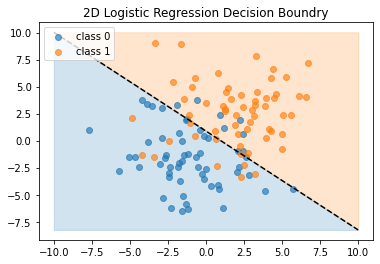

In [541]:
w_0, w_1, w_2 = logreg_2d.w

D = np.linspace(-10, 10, 2)
R = -(w_0+w_1*D) / w_2

# Plot the decision boundry for the model
plt.fill_between(D, R, min(R), color='tab:blue', alpha=0.2)
plt.fill_between(D, R, max(R), color='tab:orange', alpha=0.2)
plt.scatter(X_train2_class0[:, 0], X_train2_class0[:, 1], c='tab:blue', alpha=0.65, label='class 0')
plt.scatter(X_train2_class1[:, 0], X_train2_class1[:, 1], c='tab:orange', alpha=0.65, label='class 1')
plt.plot(D, R, '--', c='black')
plt.title('2D Logistic Regression Decision Boundry')
plt.legend(loc='upper left')
plt.show()

#### Metrics

##### Accuracy, Precision, Recall, and F1 Score

In [542]:
print('Classification Metrics (testing data):\n' + '-'*38)
print('accuracy = %.3f' % accuracy(y_test2, y_pred2))
print('precsion = %.3f' % precision(y_test2, y_pred2))
print('recall = %.3f' % recall(y_test2, y_pred2))
print('f1 score = %.3f' % f1(y_test2, y_pred2))

Classification Metrics (testing data):
--------------------------------------
accuracy = 0.875
precsion = 0.857
recall = 0.900
f1 score = 0.878


##### Confustion Matrix

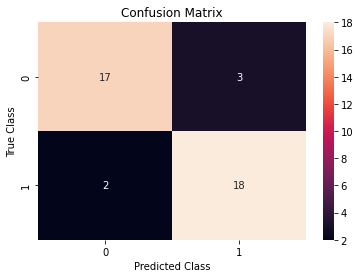

In [543]:
cf2 = conf_mat(y_test2, y_pred2)

sns.heatmap(cf2, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

##### Receiver Operating Characteristic (ROC) Curve and AUC

Area Under Curve (AUC): 0.9375


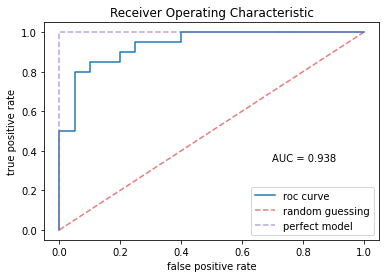

In [544]:
tp_rates2, fp_rates2, auc2 = get_roc(y_test2, y_pred_proba2)

# Plot roc curve
print('Area Under Curve (AUC):', auc2)
plt.plot(tp_rates2, fp_rates2, label='roc curve')
plt.plot([0, 1], [0, 1], label='random guessing', c='tab:red', linestyle='dashed', alpha=0.6)
plt.plot([0, 0, 1], [0, 1, 1], label='perfect model', c='tab:purple', linestyle='dashed', alpha=0.6)
plt.title('Receiver Operating Characteristic')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.text(0.7, 0.35, 'AUC = ' + str(round(auc2, 3)))
plt.legend()
plt.show()

---

## 4. Multi-Target Logistic Regression

---

#### Generate Dataset

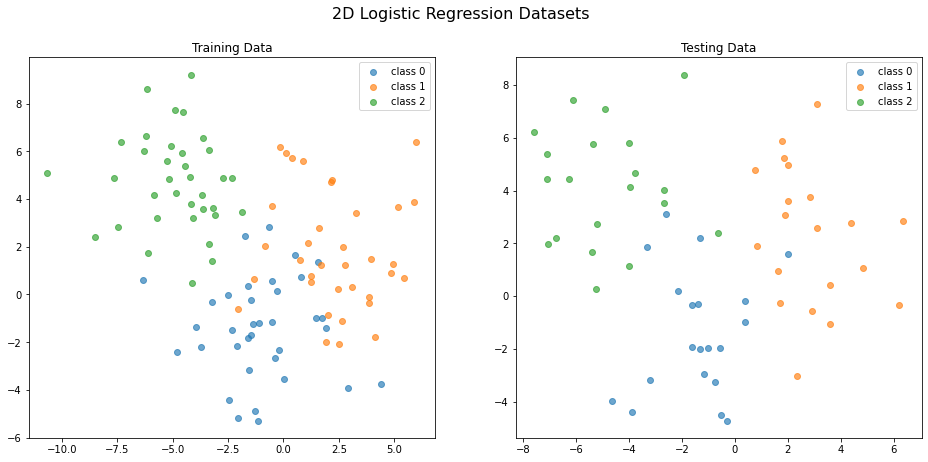

In [545]:
def generate_data_ovr(seed, x_shape):
  np.random.seed(seed)
  x1 = np.random.normal(-1, 2, size=x_shape)
  x2 = np.random.normal(2.4, 2, size=x_shape)
  x3 = np.random.normal(-5, 2, size=x_shape)*[1, -1]
  y1 = np.array([0 for i in range(x_shape[0])])
  y2 = np.array([1 for i in range(x_shape[0])])
  y3 = np.array([2 for i in range(x_shape[0])])

  return np.vstack((x1, x2, x3)), np.vstack((y1, y2, y3))

def one_hot_encode(y):
  unique_values = np.unique(y)
  encodings = {}

  for i, x in enumerate(unique_values):
    enc = np.zeros(len(unique_values))
    enc[i] = 1
    encodings[x] = enc

  y_one_hot = np.zeros((len(y), len(unique_values)))
  for i, x in enumerate(y):
    y_one_hot[i] = encodings[x]

  return y_one_hot

X_train3, y_train3 = generate_data_ovr(150, (35, 2))
X_test3, y_test3 = generate_data_ovr(15, (20, 2))

y_train3 = one_hot_encode(y_train3.flatten())
y_test3 = one_hot_encode(y_test3.flatten())

# Plot datasets
fig, ax = plt.subplots(1, 2, figsize=(16, 7))
plt.suptitle('2D Logistic Regression Datasets', fontsize=16)

X_train3_class0 = X_train3[[np.array_equal(y_train3[i], [1, 0, 0]) for i in range(len(y_train3))]]
X_train3_class1 = X_train3[[np.array_equal(y_train3[i], [0, 1, 0]) for i in range(len(y_train3))]]
X_train3_class2 = X_train3[[np.array_equal(y_train3[i], [0, 0, 1]) for i in range(len(y_train3))]]
ax[0].scatter(X_train3_class0[:, 0], X_train3_class0[:, 1], c='tab:blue', alpha=0.65, label='class 0')
ax[0].scatter(X_train3_class1[:, 0], X_train3_class1[:, 1], c='tab:orange', alpha=0.65, label='class 1')
ax[0].scatter(X_train3_class2[:, 0], X_train3_class2[:, 1], c='tab:green', alpha=0.65, label='class 2')
ax[0].set_title('Training Data')
ax[0].legend(loc='upper right')

X_test3_class0 = X_test3[[np.array_equal(y_test3[i], [1, 0, 0]) for i in range(len(y_test3))]]
X_test3_class1 = X_test3[[np.array_equal(y_test3[i], [0, 1, 0]) for i in range(len(y_test3))]]
X_test3_class2 = X_test3[[np.array_equal(y_test3[i], [0, 0, 1]) for i in range(len(y_test3))]]
ax[1].scatter(X_test3_class0[:, 0], X_test3_class0[:, 1], c='tab:blue', alpha=0.65, label='class 0')
ax[1].scatter(X_test3_class1[:, 0], X_test3_class1[:, 1], c='tab:orange', alpha=0.65, label='class 1')
ax[1].scatter(X_test3_class2[:, 0], X_test3_class2[:, 1], c='tab:green', alpha=0.65, label='class 2')
ax[1].set_title('Testing Data')
ax[1].legend(loc='upper right')

---

### One Vs. Rest

---

#### Define One Vs Rest Class

In [546]:
class LogisticRegresionOVR():

  def __init__(self, lr=0.05, iterations=1000):
    self.lr = lr
    self.iterations = iterations

  def fit(self, X, y):
    """y is assumed to be a list of one-hot vectors"""
    num_models = len(y[0])
    self.logreg_models = [LogisticRegression(self.lr, self.iterations) for i in range(num_models)]

    # Fit each model using the one VS rest approach
    for i in range(num_models):
      y_one = y[:, i]
      y_rest = np.sum(np.delete(y, i, axis=1), axis=1)
      y_ovr_split = np.column_stack((y_one, y_rest))
      self.logreg_models[i].fit(X, y[:, i].reshape(-1, 1))

  def predict(self, X):
    preds = np.column_stack([m.predict_proba(X)[:, 0] for m in self.logreg_models])
    return np.argmax(preds, axis=1)

  def __str__(self):
    model_str = ''
    
    for i, m in enumerate(self.logreg_models):
      model_str += 'model ' + str(i+1) + ': ' + m.__str__() + '\n'

    return model_str

#### Fit a One Vs Rest Logistic Regression Model

In [547]:
logreg_ovr = LogisticRegresionOVR()
logreg_ovr.fit(X_train3, y_train3)
print(logreg_ovr)

model 1: y = 1 / [1 + e^{-(-0.8566756622316503 + 0.5159249823670846x_1 + -4.039143334620551x_2)}]
model 2: y = 1 / [1 + e^{-(-2.915806072378593 + 3.2602894562434788x_1 + 1.695296632773751x_2)}]
model 3: y = 1 / [1 + e^{-(-8.561553109055664 + -1.8938651771540767x_1 + 1.0502786461569134x_2)}]



#### Use Fit Model to Make Predictions on the Testing Data

In [548]:
y_pred3 = logreg_ovr.predict(X_test3)
print('Actual Classes:', np.argmax(y_test3, axis=1))
print('Predicted Classes:', y_pred3)

Actual Classes: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Predicted Classes: [0 0 0 0 0 0 0 0 1 0 0 0 0 2 1 0 0 0 0 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2]


#### Model Visualization

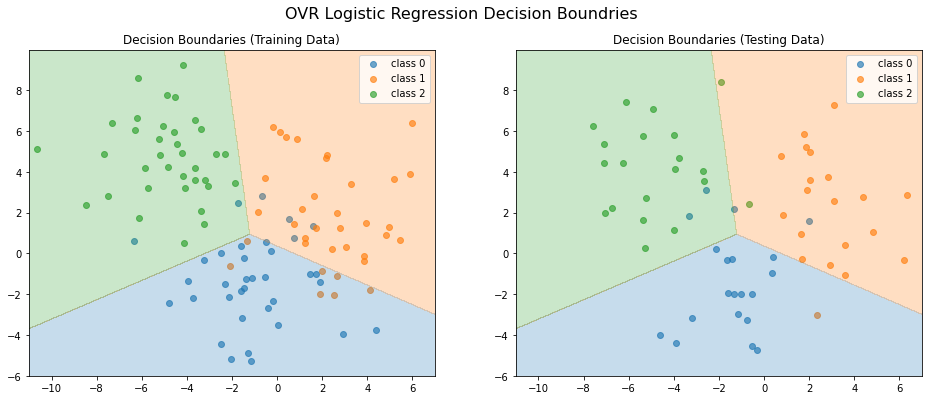

In [549]:
xx, yy = np.mgrid[-11:7:0.01, -6:10:0.01]
D = np.c_[xx.ravel(), yy.ravel()]
R = logreg_ovr.predict(D).reshape(xx.shape)


# Plot the decision boundries of the one vs rest model for the training and testing data.
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
plt.suptitle('OVR Logistic Regression Decision Boundries', fontsize=16)

X_train3_class0 = X_train3[[np.array_equal(y_train3[i], [1, 0, 0]) for i in range(len(y_train3))]]
X_train3_class1 = X_train3[[np.array_equal(y_train3[i], [0, 1, 0]) for i in range(len(y_train3))]]
X_train3_class2 = X_train3[[np.array_equal(y_train3[i], [0, 0, 1]) for i in range(len(y_train3))]]
ax[0].scatter(X_train3_class0[:, 0], X_train3_class0[:, 1], c='tab:blue', alpha=0.65, label='class 0')
ax[0].scatter(X_train3_class1[:, 0], X_train3_class1[:, 1], c='tab:orange', alpha=0.65, label='class 1')
ax[0].scatter(X_train3_class2[:, 0], X_train3_class2[:, 1], c='tab:green', alpha=0.65, label='class 2')
ax[0].contourf(xx, yy, R, alpha=0.25, levels=2, colors=['tab:blue', 'tab:orange', 'tab:green'])
ax[0].set_title('Decision Boundaries (Training Data)')
ax[0].legend(loc='upper right')

X_test3_class0 = X_test3[[np.array_equal(y_test3[i], [1, 0, 0]) for i in range(len(y_test3))]]
X_test3_class1 = X_test3[[np.array_equal(y_test3[i], [0, 1, 0]) for i in range(len(y_test3))]]
X_test3_class2 = X_test3[[np.array_equal(y_test3[i], [0, 0, 1]) for i in range(len(y_test3))]]
ax[1].scatter(X_test3_class0[:, 0], X_test3_class0[:, 1], c='tab:blue', alpha=0.65, label='class 0')
ax[1].scatter(X_test3_class1[:, 0], X_test3_class1[:, 1], c='tab:orange', alpha=0.65, label='class 1')
ax[1].scatter(X_test3_class2[:, 0], X_test3_class2[:, 1], c='tab:green', alpha=0.65, label='class 2')
ax[1].contourf(xx, yy, R, alpha=0.25, levels=2, colors=['tab:blue', 'tab:orange', 'tab:green'])
ax[1].set_title('Decision Boundaries (Testing Data)')
ax[1].legend(loc='upper right')

plt.show()

#### Metrics

##### Accuracy, Precision, Recall, and F1 Score

In [550]:
def precision_mult(y, y_pred):
  scores = [precision(y[:, i], y_pred[:, i]) for i in range(len(y[0]))]
  return np.mean(scores)

def recall_mult(y, y_pred):
  scores = [recall(y[:, i], y_pred[:, i]) for i in range(len(y[0]))]
  return np.mean(scores)

def f1_mult(y, y_pred):
  scores = [f1(y[:, i], y_pred[:, i]) for i in range(len(y[0]))]
  return np.mean(scores)

y_pred3_onehot = one_hot_encode(y_pred3)
y_test3_class = np.argmax(y_test3, axis=1)

print('Classification Metrics (testing data):\n' + '-'*38)
print('accuracy = %.3f' % accuracy(y_test3_class, y_pred3))
print('precsion = %.3f' % precision_mult(y_test3, y_pred3_onehot))
print('recall = %.3f' % recall_mult(y_test3, y_pred3_onehot))
print('f1 score = %.3f' % f1_mult(y_test3, y_pred3_onehot))

Classification Metrics (testing data):
--------------------------------------
accuracy = 0.883
precsion = 0.889
recall = 0.883
f1 score = 0.883


##### Confusion Matrix

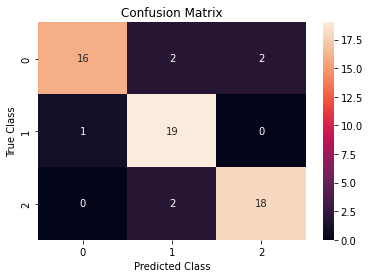

In [551]:
def conf_mat(y, y_pred):
  num_classes = len(np.unique(y))
  cf_mat = np.zeros((num_classes, num_classes))

  for y1, y2 in zip(y.flatten(), y_pred.flatten()):
    cf_mat[y1, y2] += 1
  
  return cf_mat

cf = conf_mat(y_test3_class, y_pred3)

sns.heatmap(cf, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

---
### One Vs. One
---

#### Define One Vs. One Class

In [552]:
# In python 3.8+ use math.comb(n, 2)
def nC2(n):
  f = math.factorial
  return f(n) // 2 // f(n-2)

class LogisticRegresionOVO():
  def __init__(self, lr=0.01, iterations=1000):
    self.lr = lr
    self.iterations = iterations

  def fit(self, X, y):
    """y is assumed to be a list of one-hot vectors"""
    num_models = nC2(len(y[0]))
    self.logreg_models = [LogisticRegression(self.lr, self.iterations) for i in range(num_models)]

    i = 0
    for j in range(num_models):
      for k in range(j+1, num_models):
        y_pair = y[:, [j, k]]

        X_ovo_split = X[~np.all(y_pair==0, axis=1)]
        y_ovo_split = y_pair[~np.all(y_pair==0, axis=1)]
  
        self.logreg_models[i].fit(X_ovo_split, y_ovo_split[:, 0].reshape(-1, 1))
        i+=1

  def predict(self, X):
    ### TODO: This is not correct....
    preds = np.column_stack([m.predict_proba(X)[:, 0] for m in self.logreg_models])
    return np.argmax(preds, axis=1)

  def __str__(self):
    model_str = ''
    
    for i, m in enumerate(self.logreg_models):
      model_str += 'model ' + str(i+1) + ': ' + str(m) + '\n'

    return model_str

#### Fit a One Vs. One Logistic Regression Model

In [553]:
logreg_ovo = LogisticRegresionOVO()
logreg_ovo.fit(X_train3, y_train3)

print(logreg_ovo)

model 1: y = 1 / [1 + e^{-(0.8240926435041074 + -0.8814337057358083x_1 + -0.757656976186742x_2)}]
model 2: y = 1 / [1 + e^{-(5.6580759004622285 + 0.9681998587187644x_1 + -1.6435995137341068x_2)}]
model 3: y = 1 / [1 + e^{-(6.696871608061592 + 2.9169548868577824x_1 + -0.6578249435694399x_2)}]



#### Use Fit Model to Make Predictions on the Testing Data

In [554]:
y_pred4 = logreg_ovo.predict(X_test3)
print('Actual Classes:', np.argmax(y_test3, axis=1))
print('Predicted Classes:', y_pred4)

Actual Classes: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Predicted Classes: [1 1 1 1 1 1 2 1 2 2 1 1 1 0 2 0 1 1 1 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0]


#### Model Visualization

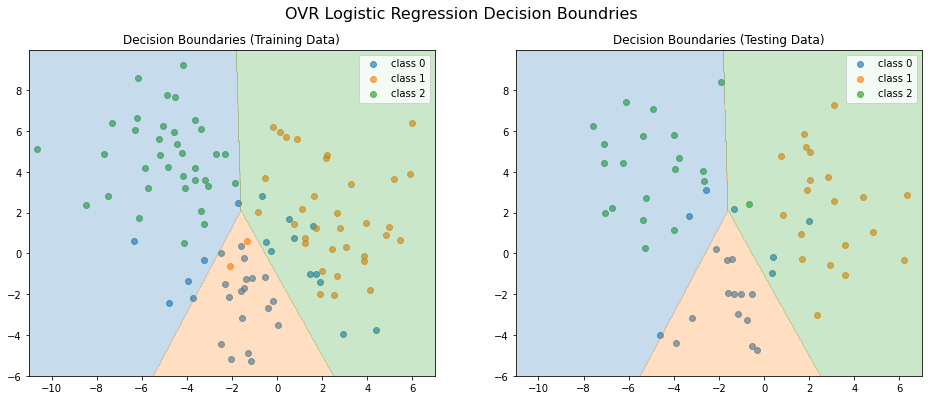

In [555]:
xx, yy = np.mgrid[-11:7:0.01, -6:10:0.01]
D = np.c_[xx.ravel(), yy.ravel()]
R = logreg_ovo.predict(D).reshape(xx.shape)


# Plot the decision boundries of the one vs rest model for the training and testing data.
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
plt.suptitle('OVR Logistic Regression Decision Boundries', fontsize=16)

X_train3_class0 = X_train3[[np.array_equal(y_train3[i], [1, 0, 0]) for i in range(len(y_train3))]]
X_train3_class1 = X_train3[[np.array_equal(y_train3[i], [0, 1, 0]) for i in range(len(y_train3))]]
X_train3_class2 = X_train3[[np.array_equal(y_train3[i], [0, 0, 1]) for i in range(len(y_train3))]]
ax[0].scatter(X_train3_class0[:, 0], X_train3_class0[:, 1], c='tab:blue', alpha=0.65, label='class 0')
ax[0].scatter(X_train3_class1[:, 0], X_train3_class1[:, 1], c='tab:orange', alpha=0.65, label='class 1')
ax[0].scatter(X_train3_class2[:, 0], X_train3_class2[:, 1], c='tab:green', alpha=0.65, label='class 2')
ax[0].contourf(xx, yy, R, alpha=0.25, levels=2, colors=['tab:blue', 'tab:orange', 'tab:green'])
ax[0].set_title('Decision Boundaries (Training Data)')
ax[0].legend(loc='upper right')

X_test3_class0 = X_test3[[np.array_equal(y_test3[i], [1, 0, 0]) for i in range(len(y_test3))]]
X_test3_class1 = X_test3[[np.array_equal(y_test3[i], [0, 1, 0]) for i in range(len(y_test3))]]
X_test3_class2 = X_test3[[np.array_equal(y_test3[i], [0, 0, 1]) for i in range(len(y_test3))]]
ax[1].scatter(X_test3_class0[:, 0], X_test3_class0[:, 1], c='tab:blue', alpha=0.65, label='class 0')
ax[1].scatter(X_test3_class1[:, 0], X_test3_class1[:, 1], c='tab:orange', alpha=0.65, label='class 1')
ax[1].scatter(X_test3_class2[:, 0], X_test3_class2[:, 1], c='tab:green', alpha=0.65, label='class 2')
ax[1].contourf(xx, yy, R, alpha=0.25, levels=2, colors=['tab:blue', 'tab:orange', 'tab:green'])
ax[1].set_title('Decision Boundaries (Testing Data)')
ax[1].legend(loc='upper right')

plt.show()

---

### Multinomial/Softmax Regression

---

#### Define the Multinomial/Softmax Regression Model

In [556]:
class SoftmaxRegression():
  def __init__(self, lr=0.05, iterations=1000):
    self.lr = lr
    self.iterations = iterations

  def softmax(self, X):
    """softmax function"""
    exp = np.exp(X@self.w)
    sigma = exp / (np.sum(exp, axis=1, keepdims=True)+1)
    return np.column_stack((sigma, 1-np.sum(sigma, axis=1)))
  
  def ce_grad(self, X, y):
    """cross-entropy gradient"""
    return X.T@(self.softmax(X)-y)[:, :-1]

  def grad_descent(self, V, y):
    """Gradient Descent"""
    # initialize weights to random value
    self.num_classes = len(y[0])
    self.w = np.random.normal(0, 0.2, size=(len(V[0]), self.num_classes-1))
    
    for i in range(self.iterations):
      self.w = self.w - self.lr*self.ce_grad(V, y)

  def fit(self, X, y):
    """y is assumed to be a list of one-hot vectors"""
    V = np.column_stack((np.ones(len(X)), X))
    self.grad_descent(V, y)

  def predict(self, X):
    V = np.column_stack((np.ones(len(X)), X))
    return np.argmax(self.softmax(V), axis=1)

  def predict_proba(self, X):
    V = np.column_stack((np.ones(len(X)), X))
    return self.softmax(V)

#### Fit a Softmax Regression Model to the Training Data

In [557]:
softreg = SoftmaxRegression(lr=0.005)
softreg.fit(X_train3, y_train3)

print('Model parameters:\n', np.round(softreg.w, 3))

Model parameters:
 [[ 4.318  3.403]
 [ 0.84   1.844]
 [-1.211 -0.291]]


#### Use Fit Model to Make Predictions on the Testing Data

In [558]:
y_pred4 = softreg.predict(X_test3)

print('Actual Classes:', np.argmax(y_test3, axis=1))
print('Predicted Classes:', y_pred4)

Actual Classes: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Predicted Classes: [0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2]


#### Model Visualization

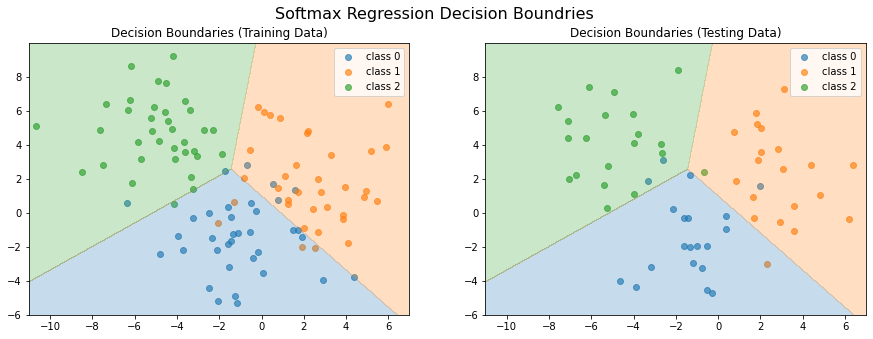

In [559]:
xx, yy = np.mgrid[-11:7:0.01, -6:10:0.01]
D = np.c_[xx.ravel(), yy.ravel()]
R = softreg.predict(D).reshape(xx.shape)

# Plot descision boundries for the training and testing datasets.
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.suptitle('Softmax Regression Decision Boundries', fontsize=16)

X_train3_class0 = X_train3[[np.array_equal(y_train3[i], [1, 0, 0]) for i in range(len(y_train3))]]
X_train3_class1 = X_train3[[np.array_equal(y_train3[i], [0, 1, 0]) for i in range(len(y_train3))]]
X_train3_class2 = X_train3[[np.array_equal(y_train3[i], [0, 0, 1]) for i in range(len(y_train3))]]
ax[0].scatter(X_train3_class0[:, 0], X_train3_class0[:, 1], c='tab:blue', alpha=0.65, label='class 0')
ax[0].scatter(X_train3_class1[:, 0], X_train3_class1[:, 1], c='tab:orange', alpha=0.65, label='class 1')
ax[0].scatter(X_train3_class2[:, 0], X_train3_class2[:, 1], c='tab:green', alpha=0.65, label='class 2')
ax[0].contourf(xx, yy, R, alpha=0.25, levels=2, colors=['tab:blue', 'tab:orange', 'tab:green'])
ax[0].set_title('Decision Boundaries (Training Data)')
ax[0].legend(loc='upper right')

X_test3_class0 = X_test3[[np.array_equal(y_test3[i], [1, 0, 0]) for i in range(len(y_test3))]]
X_test3_class1 = X_test3[[np.array_equal(y_test3[i], [0, 1, 0]) for i in range(len(y_test3))]]
X_test3_class2 = X_test3[[np.array_equal(y_test3[i], [0, 0, 1]) for i in range(len(y_test3))]]
ax[1].scatter(X_test3_class0[:, 0], X_test3_class0[:, 1], c='tab:blue', alpha=0.65, label='class 0')
ax[1].scatter(X_test3_class1[:, 0], X_test3_class1[:, 1], c='tab:orange', alpha=0.65, label='class 1')
ax[1].scatter(X_test3_class2[:, 0], X_test3_class2[:, 1], c='tab:green', alpha=0.65, label='class 2')
ax[1].contourf(xx, yy, R, alpha=0.25, levels=2, colors=['tab:blue', 'tab:orange', 'tab:green'])
ax[1].set_title('Decision Boundaries (Testing Data)')
ax[1].legend(loc='upper right')

plt.show()

#### Metrics

##### Accuracy, Precision, Recall, and F1 Score

In [560]:
y_pred4_onehot = one_hot_encode(y_pred4)

print('Classification Metrics (testing data):\n' + '-'*38)
print('accuracy = %.3f' % accuracy(y_test3_class, y_pred4))
print('precsion = %.3f' % precision_mult(y_test3, y_pred4_onehot))
print('recall = %.3f' % recall_mult(y_test3, y_pred4_onehot))
print('f1 score = %.3f' % f1_mult(y_test3, y_pred4_onehot))

Classification Metrics (testing data):
--------------------------------------
accuracy = 0.917
precsion = 0.918
recall = 0.917
f1 score = 0.916


##### Confusion Matrix

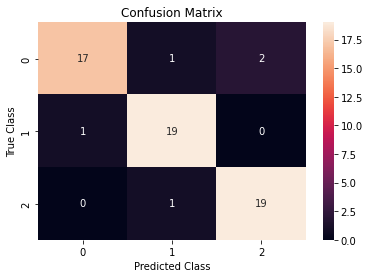

In [561]:
cf = conf_mat(y_test3_class, y_pred4)

sns.heatmap(cf, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

---

## Conclusions

---

1. Logistic Regression is technically a regression model, but it is commonly used for classification problems.
 - Think of the regression model as being fit to the probabilities that a given input belongs to some class.

2. Since Logistic Regression is technically a regression model, fitting the model comes down to minimizing an error surface.
 -  The error surface for logistic regression is given by the binary cross entropy loss function (as opposed to the sum of square errors for linear regression). i.e. set derivatives to zero.
 - Unlike with linear regression, we cannot solve the minimization problem analytically. Instead we turn to iterative algorithms such as **gradient descent**. 

3. Vanila Logistic Regression is used to solve binary classification problems.

4. There are multiple strategies to fit logistic regression models to data with more than two classes.
 - one-vs-rest: Fit one logistic regression model per class which seperates that **one** class from the **rest** of the classes.
 - one-vs-one: Fit one class to seperate each pair of classes. That is, fit models to seperate **one** class from **one** other class and do this for each pair of two distinct classes.
 - multinomial/sofmax: Fit a single generalized logistic regression model (a softmax regression model) which supports multiple classes and outputs a vector of probabilities for each class.